# Titanic: Machine Learning from Disaster

---
## Table of Contents  
* [1. Data Overview](#1)  
    * [1.1 Competition Description](#1.1)  
    * [1.2 Data Dictionary](#1.2)  
    * [1.3 Variable Notes](#1.3)  
* [2. Exploratory Data Analysis](#2)  
    * [2.1 Univariate Analysis](#2.1)  
        * [2.1.1 Continuous Variables](#2.1.1)  
        * [2.1.2 Categorical Variables](#2.1.2)  
    * [2.2 Bivariate Analysis](#2.2)
        * [2.2.1 Continuous Variables vs. Continuous Variables](#2.2.1)
        * [2.2.2 Categorical Variables vs. Categorical Variables](#2.2.2)  
        * [2.2.3 Categorical Variables vs. Continuous Variables](#2.2.3)
* [3. Missing Value Treatment](#3)
* [4. Feature Engineering](#4)
* [5. Model Creation](#5)
    * [5.1 Data Preparation](#5.1)  
    * [5.2 Logistic Regression](#5.2)  
    * [5.3 K-Nearest Neighbors](#5.3)
    * [5.4 Random Forest Classifier](#5.4)
    * [5.5 Gradient Boosted Classifier](#5.5)
* [6. Conclusions and Future Work](#6)

---
<a id='1'></a>
## 1. Data Overview

<a id='1.1'></a>
### 1.1 Competition Description  
In this project, we will be applying several different machine learning techniques to the Titanic dataset hosted on [Kaggle](https://www.kaggle.com/c/titanic).  The purpose of this exercise is to predict whether a passenger on the Titanic survived or not with model accuracy being the measure of success.  The competition is descrbed as follows on the Kaggle website:
> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

<a id='1.2'></a>
### 1.2 Data Dictionary  
|Variable|Definition|Key|Type of Variable|Data Type|Variable Category|
|--------|----------|---|----------------|---------|-----------------|
|survival|Survival|0 = No, 1 = Yes|Target variable|Numeric|Categorical|
|pclass|Ticket class||Predictor variable|Numeric|Categorical|
|name|Passenger name||Predictor variable|Character|Categorical|
|sex|Sex||Predictor variable|Character|Categorical|
|Age|Age in years||Predictor varible|Numeric|Continuous|
|sibsp|# of siblings / spouses aboard the Titanic||Predictor variable|Numeric|Continuous|
|parch|# of parents / children aboard the Titanic||Predictor variable|Numeric|Continuous|
|ticket|Ticket number||Predictor variable|Character|Categorical|
|fare|Passenger fare||Predictor variable|Numeric|Continuous|
|cabin|Cabin number||Predictor variable|Character|Categorical|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|Predictor variable|Character|Categorical|

<a id='1.3'></a>
### 1.3 Variable Notes  
__pclass__: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  
  
__age__: Age is fractional if less than 1.  If the age is estimated, it is in the form of xx.5  

__sibsp__: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

__parch__: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.

---
<a id='2'></a>
## 2 Exploratory Data Analysis

<a id='2.1'></a>
### 2.1 Univariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

First, we need to read in the test and train data sets.  Both data sets were provided by Kaggle.  The training set includes Survived values and the test set does not.  Predictions for test set values must be submitted to Kaggle in order to determine accuracy.

In [2]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

Now that the data has been imported, we can use the Pandas info() method to see some basic information about the training set.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training  data contains 891 records.  The Age, Cabin, and Embarked variables all appear to be missing some values and will most likely require some sort of imputation.  We may also want to modify the data types for some of these variables.  For example, the Sex variable is currently a default Pandas object, but may prove more useful if converted to a boolean value.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The Name, Sex, Ticket, Cabin, and Embarked columns are currently text values.  We will most likely want to replace at least some of these with dummy variables in order to include them in the models.  

The ticket variable seems to have different formats for different values.  Further investigation will need to be done in order to determine if this variable can provide any value.  

The Cabin variable is farely sparse, but the missing values may not be random.  It is likely that cabins were only assigned to higher passenger classes.  In this very small sample of data, the two records with Cabin values are for first class passengers and the three records with null Cabin values are third class passengers.  This will require further investigation.

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2.1.1'></a>
#### 2.1.1 Continuous Variables

[Text(0,0,'Age')]

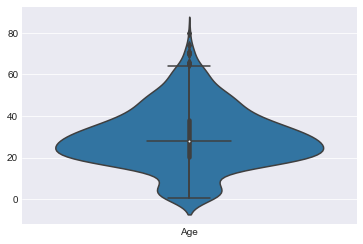

In [6]:
sns.violinplot(data=train['Age'])
sns.boxplot(data=train['Age'], showbox=False, width=0.25).set_xticklabels(['Age'])

The Age variable has a min of 0.42 years and a max of 80.  Both of these values seem reasonable.  The distribution of ages is slightly bimodal.  There appear to have been more children on the ship than elderly people.  The mean age is slightly below 30.

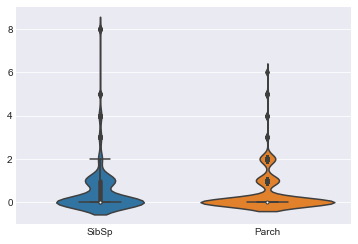

In [7]:
sns.violinplot(data=train[['SibSp','Parch']])
sns.boxplot(data=train[['SibSp','Parch']], showbox=False, width=0.25)

The SibSp and Parch variables are both extremely right-tailed.  We will most likely want to use a transform on these variables if they are going to be included in models that assume a normal distribution.  The bulk of the records have values of 0 for SibSp and Parch.  The maximum value for SibSp is 8 and the max for Parch is 6.

[Text(0,0,'Fare')]

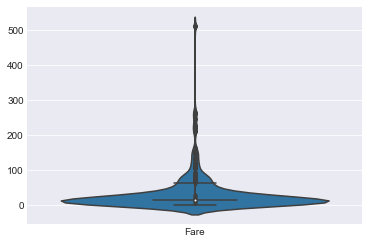

In [8]:
sns.violinplot(data=train['Fare'])
sns.boxplot(data=train['Fare'], showbox=False, width=0.25).set_xticklabels(['Fare'])

The Fare variable is also somewhat skewed.  If you look closely though, it appears that the distribution is fairly normal, but being skewed by a few severe outliers.  We will need to investigate these outliers and try to determine if they are valid.

In [9]:
train.sort_values('Fare',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


Upon further inspection, we can see that most of these outlier fares occur multiple times with more than one person having the same ticket number.  We can try to create a new feature for the individual fare, which would just be the fare divided by the number of people.  However, this method is flawed, because there are most likely instances where some of a party's members are in the training set and some are in the test set.  In order to deal with this issue, we will get a count of ticket numbers from both sets and use that to determine individual fare.  

Let's take a closer look at the values in the Ticket column before calculating these counts though.

In [10]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

We can see that the prefixes for some ticket numbers are not always formatted the same way.  For example, there are values that start with 'CA', 'CA.', and 'C.A.'.  There are also prefixes with different cases.  For example, there are tickets with prefixes of 'SC/PARIS' and also 'SC/Paris'.  In order to deal with these cases, we will write a function to remove all punction and whitespace and convert all letters to upper case.  We will also create duplicate dataframes for the test and train sets in order to leave the originals in tact.

In [11]:
import re, string

def clean_ticket(ticket):
    ticket = ticket.upper()
    ticket = ''.join(ticket.split())
    ticket = ''.join(ticket.split(string.punctuation))
    
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    ticket = regex.sub('', ticket)
    
    return ticket

In [12]:
# Create duplicate dataframes in order to leave the original data in tact
df_train = train.copy()
df_test = test.copy()

# Create a new column with the clean versions of the ticket values
df_train['clean_ticket'] = df_train['Ticket'].apply(clean_ticket)
df_test['clean_ticket'] = df_test['Ticket'].apply(clean_ticket)

df_train['clean_ticket'].unique()

array(['A521171', 'PC17599', 'STONO23101282', '113803', '373450', '330877',
       '17463', '349909', '347742', '237736', 'PP9549', '113783', 'A52151',
       '347082', '350406', '248706', '382652', '244373', '345763', '2649',
       '239865', '248698', '330923', '113788', '347077', '2631', '19950',
       '330959', '349216', 'PC17601', 'PC17569', '335677', 'CA24579',
       'PC17604', '113789', '2677', 'A52152', '345764', '2651', '7546',
       '11668', '349253', 'SCPARIS2123', '330958', 'SCA423567', '370371',
       '14311', '2662', '349237', '3101295', 'A439886', 'PC17572', '2926',
       '113509', '19947', 'CA31026', '2697', 'CA34651', 'CA2144', '2669',
       '113572', '36973', '347088', 'PC17605', '2661', 'CA29395', 'SP3464',
       '3101281', '315151', 'CA33111', 'SOC14879', '2680', '1601',
       '348123', '349208', '374746', '248738', '364516', '345767',
       '345779', '330932', '113059', 'SOC14885', '3101278', 'WC6608',
       'SOTONOQ392086', '343275', '343276', '347466', 

The new 'clean_ticket' column now contains the ticket numbers in all caps with no punctuation marks or whitespace.  Now we can generate the counts for each ticket number.  We will do this by creating a new vector containing the clean_ticket values from both the train and test sets and then create a dictinary of the value counts for that vector.  We will then divide the fare for each passenger by their corresponding value in that dictionary and sotre the result in a new column called 'ind_fare.'

In [13]:
df_ticket = df_train['clean_ticket'].append(df_test['clean_ticket'])
ticket_counts = dict(df_ticket.value_counts())

def divide_fare(fare, ticket, lookup):
    try:
        return fare / lookup[ticket]
    except:
        return fare
    
df_train['ind_fare'] = df_train.apply(lambda x: divide_fare(x['Fare'], x['clean_ticket'], ticket_counts), axis=1)
df_test['ind_fare'] = df_test.apply(lambda x: divide_fare(x['Fare'], x['clean_ticket'], ticket_counts), axis=1)

Now, let's look at the distribution for the new ind_fare column.

[Text(0,0,'ind_fare')]

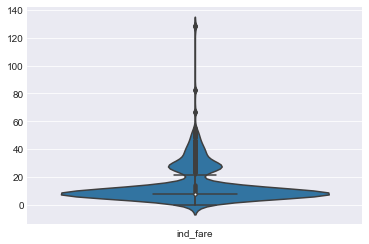

In [14]:
sns.violinplot(data=df_train['ind_fare'])
sns.boxplot(data=df_train['ind_fare'], showbox=False, width=0.25).set_xticklabels(['ind_fare'])

The values have come down quite a bit, but we still have some outliers.  Let's look a little closer at those and see if we've missed something.

In [15]:
df_train.sort_values('ind_fare',ascending=False).head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_ticket,ind_fare
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,PC17755,128.082300
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,PC17755,128.082300
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,PC17755,128.082300
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,PC17558,82.506933
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,PC17558,82.506933
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,PC17611,66.825000
334,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,NaN,1,0,PC 17611,133.6500,NaN,S,PC17611,66.825000
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,PC17483,55.444800
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,24160,52.834375
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S,24160,52.834375


The max value for individual fare is \$128.  This equates to about $3130 in 2017 dollars.  While fairly pricey, this does not seem inconceivable for first class accommodations on the maiden voyage of a luxury cruise ship. Since we can not find a valid reason to modify or remove these outliers, we will keep them in the dataset.

<a id='2.1.2'></a>
#### 2.1.2 Categorical Variables

In [16]:
pd.crosstab(index=df_train['Survived'],columns='count')

col_0,count
Survived,
0,549
1,342


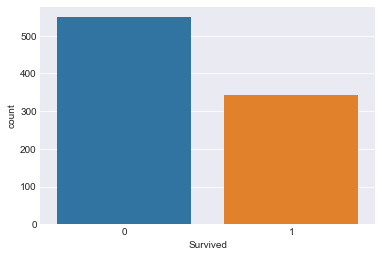

In [17]:
sns.countplot(x='Survived',data=df_train)

We can see that the counts of people who survived and people who died are not distributed evenly.  About two thirds of the passengers in the training data set died.  We will need to take this into consideration later on when we are contructing our models.

In [18]:
pd.crosstab(index=df_train['Pclass'],columns='count')

col_0,count
Pclass,
1,216
2,184
3,491


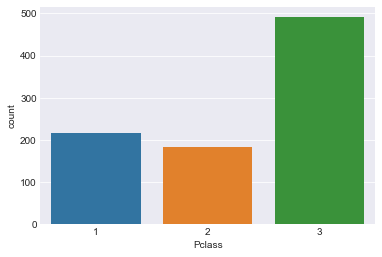

In [19]:
sns.countplot(x='Pclass',data=df_train)

A little more than half of the passengers had third class accommodations.  Somewhat surprisingly, there were more first class passengers than second class in the training set.

In [20]:
pd.crosstab(index=df_train['Sex'],columns='count')

col_0,count
Sex,
female,314
male,577


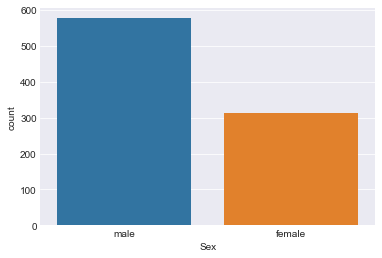

In [21]:
sns.countplot(x='Sex',data=df_train)

Interestingly, there are twice as many male passengers as female passengers in the training data.

In [22]:
pd.crosstab(index=df_train['Embarked'],columns='count')

col_0,count
Embarked,
C,168
Q,77
S,644


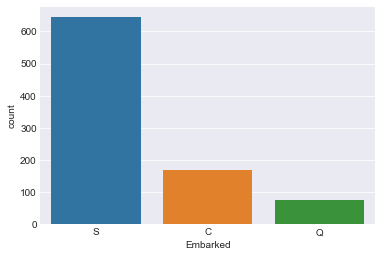

In [23]:
sns.countplot(x='Embarked',data=df_train)

The vast majority of the passengers embarked at the origin port of Southampton.  Of the remaining passengers, the number of passengers who boarded in Cherbourg was about twice as many as those who boarded in Queenstown.

<a id='2.2'></a>
### 2.2 Bivariate Analysis

Next, we'll plot a correlation matrix of the training data to see if any of the features are correlated with each other.

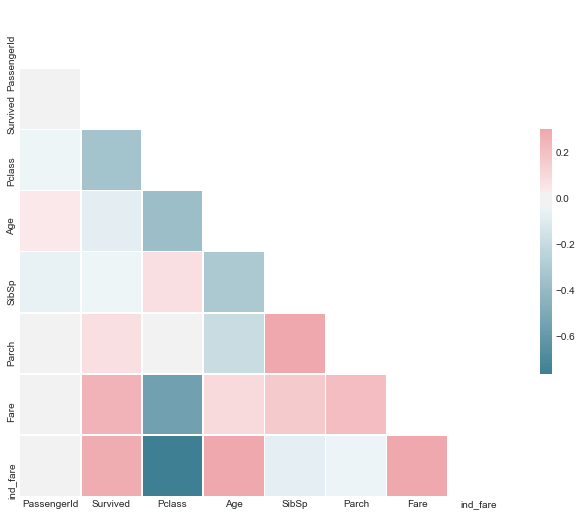

In [24]:
# Set the style for the plot
sns.set_style('white')

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
           square=True, linewidth=0.5, cbar_kws={'shrink': 0.5})

In [25]:
print(corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   
ind_fare        0.006161  0.288337 -0.762981  0.313085 -0.073529 -0.036442   

                 Fare  ind_fare  
PassengerId  0.012658  0.006161  
Survived     0.257307  0.288337  
Pclass      -0.549500 -0.762981  
Age          0.096067  0.313085  
SibSp        0.159651 -0.073529  
Parch        0.216225 -0.036442  
Fare         1.000000  0.827073  
ind_fare     0.827073  1.

On first glance, it looks like Pclass and Fare have a strong negative correlation.  This makes sense, given that higher class tickets generally cost more.  Both of these variables are also positively correlated with Survival.  The Survivl correlation is slightly stronger with Pclass than with Fare though.

Parch has a strong correlation with SibSp.  This lso makes sense, given that most people with children on board were most likely also traveling with a spouse.  

There is also a slight negative correlation between SibSp and Age.  This is most likely due to the fact the majority of people with siblings on board were probably children.  

There is a negative correlation between Age and Pclass as well.  Maybe larger families weren't able to spring for fancy accommodations.  

Obviously, there is also an extremely strong correlation between the Fare and ind_fare variables, because they contain essentially the same data.  We will only be using one of these variables in our models (most likely ind_fare).

Let's dig into all of this a little further and look at some additional relationships as well.

<a id='2.2.1'></a>
#### 2.2.1 Continuous Variables vs. Continuous Variables

First, let's compare just the continuous variables with each other (and the dependant variable).

C:\Users\xzach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\xzach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


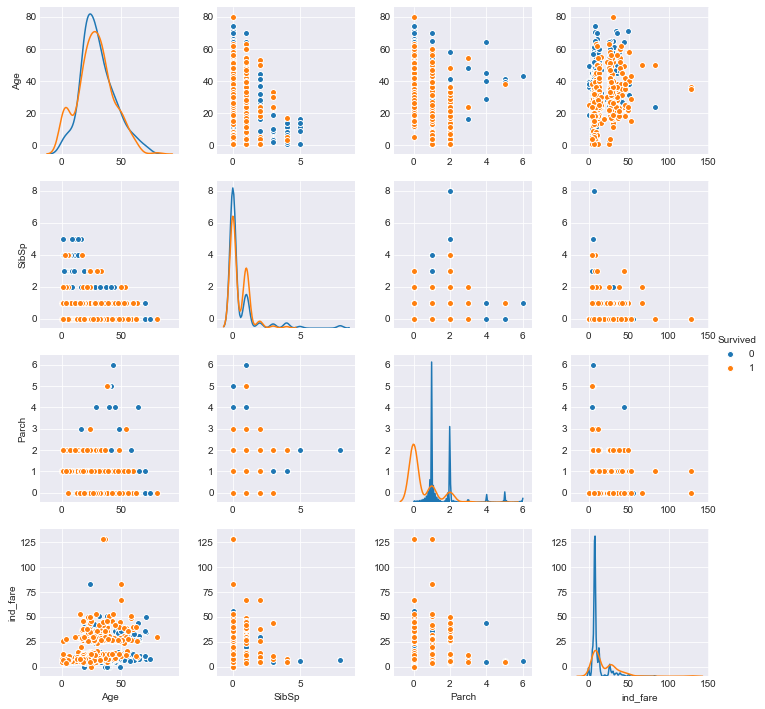

In [26]:
sns.set_style('darkgrid')

sns.pairplot(df_train,
             x_vars=['Age','SibSp','Parch','ind_fare'],
             y_vars=['Age','SibSp','Parch','ind_fare'],
             hue='Survived',
             diag_kind='kde')

In [27]:
# Create correlation matrix for continuous variables
corr = df_train[['Age','SibSp','Parch','ind_fare','Survived']].corr()
print(corr)

               Age     SibSp     Parch  ind_fare  Survived
Age       1.000000 -0.308247 -0.189119  0.313085 -0.077221
SibSp    -0.308247  1.000000  0.414838 -0.073529 -0.035322
Parch    -0.189119  0.414838  1.000000 -0.036442  0.081629
ind_fare  0.313085 -0.073529 -0.036442  1.000000  0.288337
Survived -0.077221 -0.035322  0.081629  0.288337  1.000000


We can see the correlation between Parch and SibSp, as passengers with higher nubers of parents and children tend to have either 1 or 2 siblings or spouses on board.  

We can also see the strong negative correlation between SibSp and Age.  This could be accounted for by lots of children having siblings on board.  

One interesting thing that stands out is the relationship between the number of parents and children with the Survival rate.  Most people with zero parents or children on board survived, but there are large spikes in deaths for people with one or two parents and children on board.  

We can also see a relationship between Survival rate and fare.  It appears that the vast majority of deaths occurred among people who paid low fares.  When the individual fare gets above about $10, the relationship between fare and survival appears to weaken.

<a id='2.2.2'></a>
#### 2.2.2 Categorical Variables vs. Categorical Variables

Next, we'll run some comparisons between categorical variables.  First let's take an overall view of all the categorical variables we're going to examine.  We want to look at the independant variables Embarked, Pclass, and Sex, as well as the dependant variable Survived.  Let's start out by running the Chi-squared test for independence for each pair of categorical variables

In [28]:
from scipy import stats

In [29]:
def print_chi2(df, col1, col2):
    obs = pd.crosstab(df[col1], df[col2])

    chi2, p, dof, expected = stats.chi2_contingency(obs)

    print('%s vs. %s' % (col1, col2))
    print('---------------------')
    print('Chi-squared Test Statistic: %s' % chi2)
    print('P-value: %s' % p)
    print('Degrees of Freedom: %s\n\n' % dof)
    
print_chi2(df_train, 'Embarked', 'Survived')
print_chi2(df_train, 'Pclass', 'Survived')
print_chi2(df_train, 'Sex', 'Survived')

Embarked vs. Survived
---------------------
Chi-squared Test Statistic: 26.4891498392
P-value: 1.76992228412e-06
Degrees of Freedom: 2


Pclass vs. Survived
---------------------
Chi-squared Test Statistic: 102.888988757
P-value: 4.5492517113e-23
Degrees of Freedom: 2


Sex vs. Survived
---------------------
Chi-squared Test Statistic: 260.717020167
P-value: 1.19735706278e-58
Degrees of Freedom: 1




We can see that each of the three categorical variables has a statistically significant relationship with survival rate, as they all have p-values that are orders of magnitude below 0.05.  Sex has the strongest correlation with survival, followed by Pclass and Embarked.  

Next let's see if there are correlations within the independent variables.

In [30]:
print_chi2(df_train, 'Embarked', 'Pclass')
print_chi2(df_train, 'Embarked', 'Sex')
print_chi2(df_train, 'Pclass', 'Sex')

Embarked vs. Pclass
---------------------
Chi-squared Test Statistic: 123.75190953
P-value: 8.43526781989e-26
Degrees of Freedom: 4


Embarked vs. Sex
---------------------
Chi-squared Test Statistic: 13.355630515
P-value: 0.00125852452323
Degrees of Freedom: 2


Pclass vs. Sex
---------------------
Chi-squared Test Statistic: 16.9714990955
P-value: 0.000206388643482
Degrees of Freedom: 2




While not as strong as the correlations with survival, we can see that none of these variables are completely independent of each other.  The strongest correlation being between the Embarked and Pclass variables.  

Next, let's take a look at cross-tabulation for all of the categorical variables and see if anything sticks out.

In [31]:
obs = pd.crosstab([df_train.Embarked,df_train.Pclass], [df_train.Sex,df_train.Survived],margins=True)
obs.style.background_gradient(cmap='summer_r')

On first glance, a few things stick out  First, we can see that the majority of passengers boarded in Southampton.  Given that Southampton was the port that the Titanic left from, this makes sense.  

We can also see that most people travelled in third class.  

There were also nearly twice as many men on the ship as women.  There appears to be a correlation between sex and survival rate, as about 74% of the female passengers survived compared to only about 19% of male passengers.  

Let's drill down a bit further and compare two independant variables with each other and the survival rate.

In [32]:
obs = pd.crosstab(df_train.Pclass, [df_train.Sex,df_train.Survived],margins=True)
obs.style.background_gradient(cmap='summer_r')

We can see that there is a correlation between Pclass and survival rate.  Women in first class, second class, and third class had survival rates of 97%, 92%, and 50% respectively.  Men in first, second, and third class had survival rates of 37%, 16%, and 14% respectively.  For both genders, the survival rate increases with class.  However, it is interesting that first class and second class have similar survival rates for women, but second and third class have similar survival rates for men.  

Next, let's compare point of embarkation and sex.

In [33]:
obs = pd.crosstab(df_train.Embarked, [df_train.Sex,df_train.Survived],margins=True)
obs.style.background_gradient(cmap='summer_r')

There appears to be a slight correlation between sex and port of embarkation.  The passengers embarking at Cherbourg were about 42% female.  The passengers embarking at Queenstown were about 47% female.  However, the passengers embarking at Southampton were only 32% female.  

Another interesting point is that survival rate among passengers who boarded at Cherbourg (55%) appears to be higher than those boarding Queenstown and Southampton (39% and 34% respectively).  

In [34]:
obs = pd.crosstab(df_train.Pclass, [df_train.Embarked,df_train.Survived],margins=True)
obs.style.background_gradient(cmap='summer_r')

When we compare passenger class with port of embarkation, we can see a possible explanation for why the survival rate for passengers who boarded at Cherbourg is higher than the other ports.  Over 50% of the passengers who boarded at Cherbourg were first class passengers, where only 20% of Southampton passengers and 2% of Queenstown passengers were in first class.  Given that there is a strong correlation between passenger class and survival rate, we would expect ports of embarkation with higher percentages of first and second class passengers to have higher survival rates.

<a id='2.2.3'></a>
#### 2.2.3 Categorical Variables vs. Continuous Variables

Now that we have looked at the correlations within and continuous variables and within categorical ariables, we still need to look at the correlations between continuous and categorical variables.  We can do this using T-Tests and ANOVA (depending on how many levels there are in the categorical variables).  This will tell us if there is a statistically significant difference between the mean values of the continuous variable for each level in the categorical variable.  

One of the assumptions of the t-test is normally distributed data.  Age is distributed fairly normally, but as we pointed out eariler, SibSp, Parch, and ind_fare are all highly skewed.  In order to perform a t-test on this variables, they will first need to be transformed.  We can use the Box-Cox power transform.  There are lots of zero values for these variables though (and Box-Cox requires all values to be positive).  To get around this, we can simply add 1 to the values before taking the transform.

In [35]:
from scipy.stats import boxcox, skew

0.8072461220857793

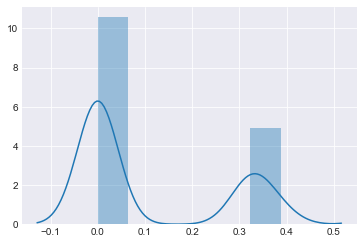

In [36]:
sns.distplot(boxcox(df_train.SibSp + 1)[0])
skew(boxcox(df_train.SibSp + 1)[0])

1.226725073614987

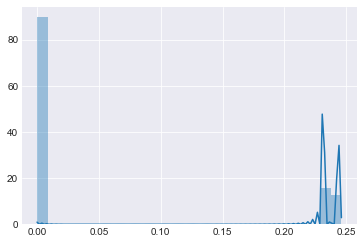

In [37]:
sns.distplot(boxcox(df_train.Parch + 1)[0])
skew(boxcox(df_train.Parch + 1)[0])

-0.009679834776783459

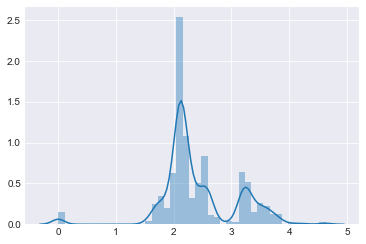

In [38]:
sns.distplot(boxcox(df_train.ind_fare + 1)[0])
skew(boxcox(df_train.ind_fare + 1)[0])

The transformed ind_fare value is now distributed fairly normally.  Unfortunately, SibSp and Parch are still highly skewed after running Box-Cox.  We will need to figure out a different method of comparison for these two variables than t-tests/ANOVA.  Since these variables both just have a small number of integer values, perhaps we can treat them as ordinal variables instead of continuous variables.

Let's start by comparing each of the four continuous variables (Age, SibSp, Parch, and ind_fare) with the Survived variable.

In [39]:
survived = df_train[df_train.Survived == 1]
died = df_train[df_train.Survived == 0]

stats.ttest_ind(survived['Age'].dropna(), died['Age'].dropna())

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

If we are to use an alpha of 0.05, there is a statistically significant relationship between age and survival rate.  The p-value is 0.039, which is slightly below the threshold.  

For the remaining 3 varibles, we noted earlier that they are highly skewed.  Since one of the assumptions of the T-Test is normally distributed data, we will need to transform the data before performing a t-test on it.

In [40]:
stats.ttest_ind(boxcox(survived['ind_fare'].dropna() + 1)[0],
                boxcox(died['ind_fare'].dropna() + 1)[0])

Ttest_indResult(statistic=-6.507896995980313, pvalue=1.2716546373300425e-10)

When performing a t-test on the power-transformed version of ind_fare between the sample of people who survived and the sample who died, we get a p-value of 1.27e-10.  This is well below our alpha of 0.05 and therefore we can reject the null hypothesis that the mean values for these samples are the same.  There is statistically significant evidence that the mean fare for survivors and passengers who perished was not the same.

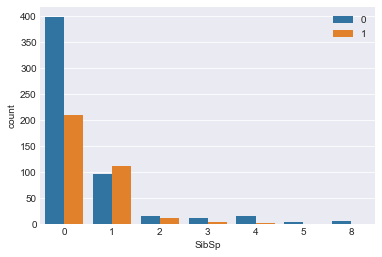

In [41]:
sns.countplot(x='SibSp',hue='Survived',data=df_train)
plt.legend(loc=1)

When breaking down the counts of survivors by number of siblings and spouses, there does not appear to be a strong relationship except for the case where SibSp is equal to 1.  Perhaps this is due to people with spouses ensuring that they get onto lifeboats.  We might consider binning this variable into values of 0, 1, and anything above 1.

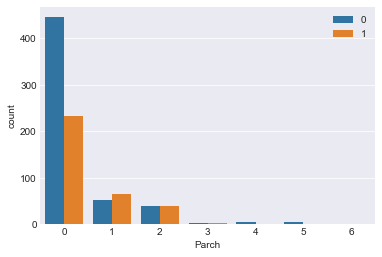

In [42]:
sns.countplot(x='Parch',hue='Survived',data=df_train)
plt.legend(loc=1)

It appears that people traveling with no parents or children had a much lower survival rate than people with any number of parents or children.  It might be fruitful to simply create a new binary feature to specify whether or not a passenger had any parents or children on board.

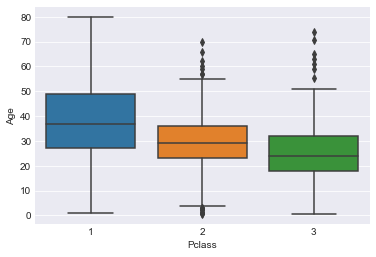

In [43]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

There appears to be a difference in mean age between passenger classes.  Let's dig a little deeper into that.

In [44]:
stats.f_oneway(df_train[df_train['Pclass'] == 1]['Age'].dropna(),
              df_train[df_train['Pclass'] == 2]['Age'].dropna(),
              df_train[df_train['Pclass'] == 3]['Age'].dropna())

F_onewayResult(statistic=57.443484340676214, pvalue=7.4879841719599036e-24)

Our eyes did not deceive us.  When performing a one way ANOVA on the age of the three different passenger classes, we get a p value of 7.49e-24.  Therefore, we can reject the null hypothesis that the mean passenger age is the same among all three passenger classes.

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797013709)

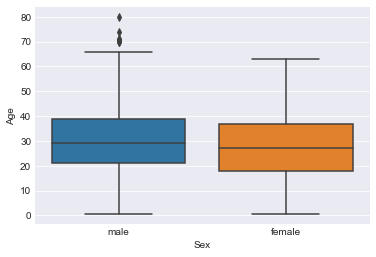

In [45]:
sns.boxplot(x='Sex',y='Age',data=df_train)

stats.ttest_ind(df_train[df_train['Sex'] == 'male']['Age'].dropna(),
               df_train[df_train['Sex'] == 'female']['Age'].dropna())

There does not appear to be much of a difference in age between male and female passengers when looking at the boxplot.  However, when performing a t-test, we get a p-value of 0.01.  This falls below our alpha of 0.05 and we can therefore reject the null hypothesis that the mean age is the same among male and female passengers.

F_onewayResult(statistic=0.63663981249102619, pvalue=0.52936937925710836)

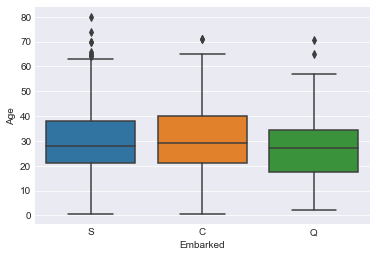

In [46]:
sns.boxplot(x='Embarked',y='Age',data=df_train)

stats.f_oneway(df_train[df_train['Embarked'] == 'S']['Age'].dropna(),
              df_train[df_train['Embarked'] == 'C']['Age'].dropna(),
              df_train[df_train['Embarked'] == 'Q']['Age'].dropna())

The mean age does not appear to vary among the different ports embarkation when looking at the boxplot.  Running a one way ANOVA reinforces this finding, as we receive a p value of 0.55.  This is well above our alpha of 0.05, which means we cannot reject the null hypothesis that the mean age is the same among these three groups.

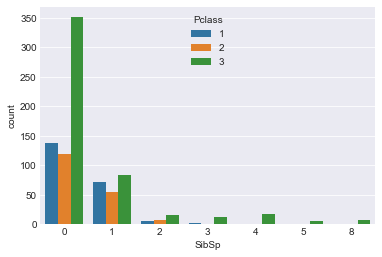

In [47]:
sns.countplot(hue='Pclass',x='SibSp',data=df_train)

The majority of people with no siblings or spouses on board were third class passengers.  

We can also see that almost all passengers with more than 2 siblings and spouses on board are third class passengers.  However, this could be due to the fact that there are so few passengers overall with that many siblings and spouses on board.  

As mentioned earlier, binning the SibSp variable into values of 0, 1, and greater than 1 might be worthwhile.  Since this variable accounts for both spouses and siblings, it would stand to reason that many of the values of 1 are spouses, where almost all of the values greater than 1 are accounted for by siblings.

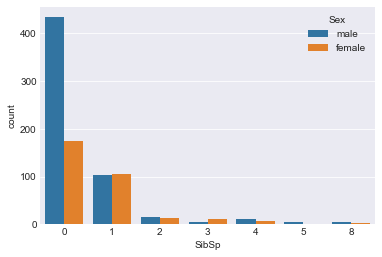

In [48]:
sns.countplot(hue='Sex',x='SibSp',data=df_train)

Male and female passengers seem to be distributed fairly equally amond all numbers of siblings and spouses except for one.  Among people with no siblings or spouses on board, the vast majority are men.

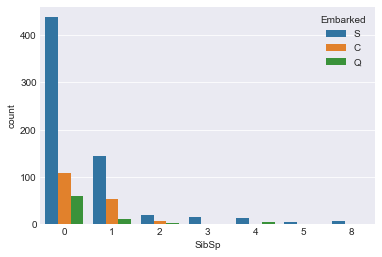

In [49]:
sns.countplot(hue='Embarked',x='SibSp',data=df_train)
plt.legend(loc=1,title='Embarked')

There does not appear to be a relationship between port of embarkation and number of siblings and spouses.

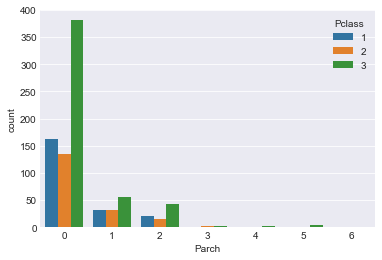

In [50]:
sns.countplot(hue='Pclass',x='Parch',data=df_train)
plt.legend(loc=1,title='Pclass')

There appears to be a higher percentage of third class passengers among those with no parents or children on board compared to other levels of the Parch variable.  

Among passengers with 1 or 2 parents or children on board, the distribution of classes appears to be similar.  

Due to the small number of passengers with more than 2 parents or children on board, it is difficult to draw any conclusions about class distribution among these passengers.  

Similarly to SibSp, we may also want to bin the Parch variable.  Values of 0, 1 or 2, and greater than 2 seem to be reasonable given our observations.

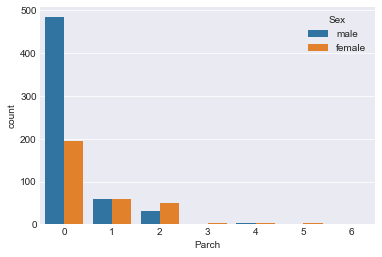

In [51]:
sns.countplot(hue='Sex',x='Parch',data=df_train)
plt.legend(loc=1,title='Sex')

Once again, we see different distributions of age among passengers with Parch values of 0, 1 or 2, and greater than 2.  Passengers with no parents or children on board are mostly male.  Passengers with 1 or 2 parents and children on board are fairly equally distributed among men and women.  

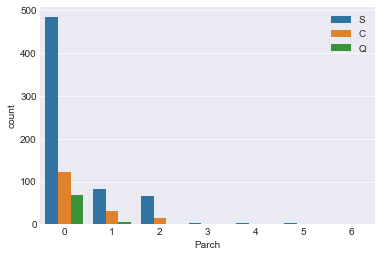

In [52]:
sns.countplot(hue='Embarked',x='Parch',data=df_train)
plt.legend(loc=1)

There does not appear to be much of a relationship between port of embarkation and number of parents and children on board.

F_onewayResult(statistic=854.69507739695473, pvalue=1.0986122259774717e-207)

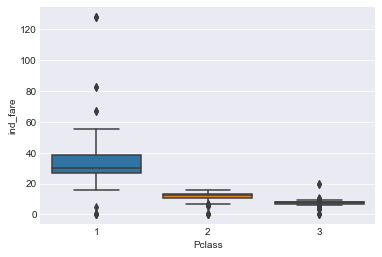

In [53]:
sns.boxplot(x='Pclass',y='ind_fare',data=df_train)

stats.f_oneway(df_train[df_train['Pclass'] == 1]['ind_fare'].dropna(),
              df_train[df_train['Pclass'] == 2]['ind_fare'].dropna(),
              df_train[df_train['Pclass'] == 3]['ind_fare'].dropna())

It is very clear that there is a strong relationship between passenger class and fare.  This makes sense, as we would expect higher class tickets to cost more.  We will only want to include one of these variables in our model to reduce multicollinearity.  Failing to do so would result in an overly sensitive model that would not generalize well to new data.

Ttest_indResult(statistic=-3.434388107759534, pvalue=0.00062135756521504481)

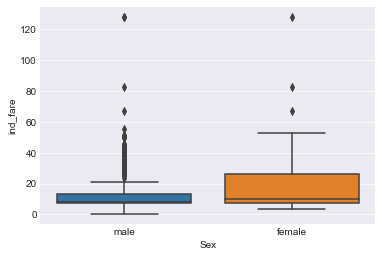

In [54]:
sns.boxplot(x='Sex',y='ind_fare',data=df_train)

stats.ttest_ind(df_train[df_train['Sex'] == 'male']['ind_fare'].dropna(),
               df_train[df_train['Sex'] == 'female']['ind_fare'].dropna())

We can see that the mean fare for female passengers is higher than for male passengers.  Female passengers also have a wider variance in fare than male passengers.  These findings are most likely related to the large percentage of males among third class passengers that we observed earlier.

F_onewayResult(statistic=60.125193832907314, pvalue=3.2685407943128892e-25)

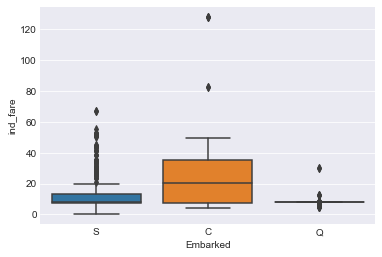

In [55]:
sns.boxplot(x='Embarked',y='ind_fare',data=df_train)

stats.f_oneway(df_train[df_train['Embarked'] == 'S']['ind_fare'].dropna(),
              df_train[df_train['Embarked'] == 'C']['ind_fare'].dropna(),
              df_train[df_train['Embarked'] == 'Q']['ind_fare'].dropna())

We can see that there is a strong relationship between port of embarkation and fare.  This makes sense given our earlier findings that a large percentage of Cherbourg passengers were first class, almost all Queenstown passengers were third class, and there were significant numbers of all three classes among Southampton passengers.

---
<a id='3'></a>
## 3 Missing Value Treatment

We saw earlier that there are some missing values in this dataset.  Let's take a look at the null counts in the dataframe to see which columns we will need to treat.

In [56]:
df_train.isnull().sum()/len(df_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.198653
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin           0.771044
Embarked        0.002245
clean_ticket    0.000000
ind_fare        0.000000
dtype: float64

In [57]:
df_train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
clean_ticket      0
ind_fare          0
dtype: int64

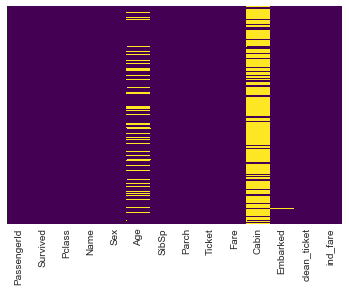

In [58]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The Age, Cabin, and Embarked columns have missing values that we will need to deal with.  

There are only two missing values for the Embarked feature, so let's take a look at those first.

In [59]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_ticket,ind_fare
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,113572,40.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,113572,40.0


It appears that both passengers with null values for the Embarked variable have the same ticket number.  Let's see if there are any other passengers with that ticket number.  If there are, we can assume that these passengers boarded at the same port.

In [60]:
df_train[df_train['clean_ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_ticket,ind_fare
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,113572,40.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,113572,40.0


Unfortunately these are the only two passengers with that ticket number.  

Let's take another look at the distribution of passengers among the three ports.

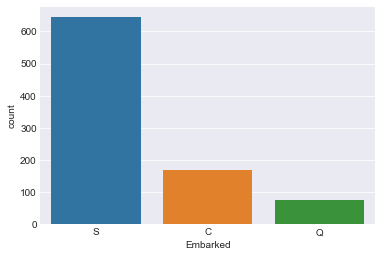

In [61]:
sns.countplot(x='Embarked',data=df_train)

Given that the vast majority of the passengers embarked at Southampton and we only have two records missing values for this feature, we will simply assign a value of 'S' to both of these records.

In [62]:
df_train['Embarked'].fillna('S',inplace=True)

Now let's deal with the missing Cabin values.  Given that 77% of the passengers do not have a Cabin value, we will just drop this column for now.  It's possible that we might be able to derive some information from the data that is in this column (e.g. determining area of the boat), but we will leave that as possible future work.

In [63]:
df_train.drop(labels='Cabin',axis=1,inplace=True)

The final column that needs to be treated is the Age column.  Assuming that the missing values are missing at random, we can use multiple imputation.  We will do this using fancyimpute's MICE (multiple imputation by chained equations) functionality.

In [64]:
from fancyimpute import MICE

Before imputing the data, we need to reformat the dataframe so that all values are numeric.  We will create dummy variables for the Sex and Embarked.  For now, we will not include any of the variables that we don't want to use in the imputation (Survived, PassengerID, Name, and Ticket).

In [65]:
df_train_missing = pd.get_dummies(df_train[['Pclass','Sex','Age','SibSp','Parch','Embarked','ind_fare']].copy(),drop_first=True)

In [66]:
df_train_missing.head()

,Pclass,Age,SibSp,Parch,ind_fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.25000,1,0,1
1,1,38.0,1,0,35.64165,0,0,0
2,3,26.0,0,0,7.92500,0,0,1
3,1,35.0,1,0,26.55000,0,0,1
4,3,35.0,0,0,8.05000,1,0,1


We can see that the new dataframe contains all numeric values.  We can now use the MICE package to perform multiple imputation on the Age column.  To do this, we need to convert the dataframe to a numpy array.

In [67]:
df_train_imp = MICE().complete(np.asarray(df_train_missing))

[MICE] Completing matrix with shape (891, 8)
[MICE] Starting imputation round 1/110, elapsed time 0.001
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.002
[MICE] Starting imputation round 4/110, elapsed time 0.003
[MICE] Starting imputation round 5/110, elapsed time 0.004
[MICE] Starting imputation round 6/110, elapsed time 0.004
[MICE] Starting imputation round 7/110, elapsed time 0.005
[MICE] Starting imputation round 8/110, elapsed time 0.006
[MICE] Starting imputation round 9/110, elapsed time 0.006
[MICE] Starting imputation round 10/110, elapsed time 0.007
[MICE] Starting imputation round 11/110, elapsed time 0.007
[MICE] Starting imputation round 12/110, elapsed time 0.008
[MICE] Starting imputation round 13/110, elapsed time 0.009
[MICE] Starting imputation round 14/110, elapsed time 0.009
[MICE] Starting imputation round 15/110, elapsed time 0.010
[MICE] Starting imputation round 16/110, elapsed time 0.011
[MIC

The imputation appears to have run successfully.  Fancyimpute returns a numpy array though, so we will need to convert this back to a Pandas dataframe and reset the column names.  We will also add the PassengerId and Survived columns back on.

In [68]:
df_train_imp = pd.DataFrame(df_train_imp)
df_train_imp.columns = df_train_missing.columns
df_train_imp.insert(0, 'Survived', df_train['Survived'])
df_train_imp.insert(0, 'PassengerId', df_train['PassengerId'])

df_train_imp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,ind_fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3.0,22.0,1.0,0.0,7.25000,1.0,0.0,1.0
1,2,1,1.0,38.0,1.0,0.0,35.64165,0.0,0.0,0.0
2,3,1,3.0,26.0,0.0,0.0,7.92500,0.0,0.0,1.0
3,4,1,1.0,35.0,1.0,0.0,26.55000,0.0,0.0,1.0
4,5,0,3.0,35.0,0.0,0.0,8.05000,1.0,0.0,1.0


In [69]:
df_train_imp.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
ind_fare       0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

We can see that there are no longer any null values.  All of the missing age values have been filled in using multiple imputation.

---
<a id='4'></a>
## 4 Feature Engineering

We mentioned earlier in the analysis that binning the Parch and SibSp variables might be fruitful.  Let's do that now.  First, we will convert the SibSp variable into bins of 0, 1, and more than 1.

In [70]:
bins = [-1,0,1,100]
group_names = ['Zero','One','Many']
df_train_imp['SibSp_bin'] = pd.cut(df_train_imp['SibSp'], bins, labels=group_names)
df_train_imp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,ind_fare,Sex_male,Embarked_Q,Embarked_S,SibSp_bin
0,1,0,3.0,22.0,1.0,0.0,7.25000,1.0,0.0,1.0,One
1,2,1,1.0,38.0,1.0,0.0,35.64165,0.0,0.0,0.0,One
2,3,1,3.0,26.0,0.0,0.0,7.92500,0.0,0.0,1.0,Zero
3,4,1,1.0,35.0,1.0,0.0,26.55000,0.0,0.0,1.0,One
4,5,0,3.0,35.0,0.0,0.0,8.05000,1.0,0.0,1.0,Zero


In [71]:
df_train_imp['SibSp_bin'].value_counts()

Zero    608
One     209
Many     74
Name: SibSp_bin, dtype: int64

In [72]:
df_train_imp['SibSp'].value_counts()

0.0    608
1.0    209
2.0     28
4.0     18
3.0     16
8.0      7
5.0      5
Name: SibSp, dtype: int64

We can see that the new 'SibSp_bin' feature contains the values of SibSp bucketed into three different categories.  

Let's now do the same with the Parch feature.  This time we will separate it into buckets of 0, 1 or 2, and more than 2 though.

In [73]:
bins = [-1,0,2,100]
group_names = ['Zero','One_Or_Two','Many']
df_train_imp['Parch_bin'] = pd.cut(df_train_imp['Parch'], bins, labels=group_names)
df_train_imp.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,ind_fare,Sex_male,Embarked_Q,Embarked_S,SibSp_bin,Parch_bin
0,1,0,3.0,22.0,1.0,0.0,7.25000,1.0,0.0,1.0,One,Zero
1,2,1,1.0,38.0,1.0,0.0,35.64165,0.0,0.0,0.0,One,Zero
2,3,1,3.0,26.0,0.0,0.0,7.92500,0.0,0.0,1.0,Zero,Zero
3,4,1,1.0,35.0,1.0,0.0,26.55000,0.0,0.0,1.0,One,Zero
4,5,0,3.0,35.0,0.0,0.0,8.05000,1.0,0.0,1.0,Zero,Zero


In [74]:
df_train_imp['Parch_bin'].value_counts()

Zero          678
One_Or_Two    198
Many           15
Name: Parch_bin, dtype: int64

In [75]:
df_train_imp['Parch'].value_counts()

0.0    678
1.0    118
2.0     80
3.0      5
5.0      5
4.0      4
6.0      1
Name: Parch, dtype: int64

Alright, we've successfully binned those two features.  Let's now drop the original versions of the Parch and SibSp columns so we won't accidentally include both versions in our model.  We should also create dummy variables for the new variables.

In [76]:
df_train_imp.drop(labels=['SibSp','Parch'],axis=1,inplace=True)

In [77]:
df_train_imp = pd.get_dummies(df_train_imp,drop_first=True)

In [78]:
df_train_imp.head()

,PassengerId,Survived,Pclass,Age,ind_fare,Sex_male,Embarked_Q,Embarked_S,SibSp_bin_One,SibSp_bin_Many,Parch_bin_One_Or_Two,Parch_bin_Many
0,1,0,3.0,22.0,7.25000,1.0,0.0,1.0,1,0,0,0
1,2,1,1.0,38.0,35.64165,0.0,0.0,0.0,1,0,0,0
2,3,1,3.0,26.0,7.92500,0.0,0.0,1.0,0,0,0,0
3,4,1,1.0,35.0,26.55000,0.0,0.0,1.0,1,0,0,0
4,5,0,3.0,35.0,8.05000,1.0,0.0,1.0,0,0,0,0


We should also take this time to remove one of either the Pclass or ind_fare variables.  Since ind_fare is more or less just an indicator of the passenger class (but with more variance introduced), we will remove this variable.

In [79]:
df_train_imp.drop('ind_fare',axis=1,inplace=True)

In [80]:
df_train_imp.head()

,PassengerId,Survived,Pclass,Age,Sex_male,Embarked_Q,Embarked_S,SibSp_bin_One,SibSp_bin_Many,Parch_bin_One_Or_Two,Parch_bin_Many
0,1,0,3.0,22.0,1.0,0.0,1.0,1,0,0,0
1,2,1,1.0,38.0,0.0,0.0,0.0,1,0,0,0
2,3,1,3.0,26.0,0.0,0.0,1.0,0,0,0,0
3,4,1,1.0,35.0,0.0,0.0,1.0,1,0,0,0
4,5,0,3.0,35.0,1.0,0.0,1.0,0,0,0,0


There is more feature engineering that could be done here.  For example, we might be able to determine which level or end of the ship passengers were on from their cabin number or extract more information from the name field.  For now, we will leave this as possible future work though and move onto creating models.

---
<a id='5'></a>
## 5 Model Creation

<a id='5.1'></a>
### 5.1 Data Preparation  

Before we can begin building models, we need to perform the same data cleaning steps on the test data that we performed on the training set.  We also need to split our independent and dependent variables into two different dataframes.

In [81]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,clean_ticket,ind_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,330911,7.82920
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,363272,7.00000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,240276,9.68750
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,315154,8.66250
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3101298,6.14375


Let's simplify things right off the bat by dropping any unneeded columns from the test set.

In [82]:
df_test.drop(['Name','Ticket','Fare','Cabin','clean_ticket','ind_fare'],axis=1,inplace=True)

In [83]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,male,34.5,0,0,Q
1,893,3,female,47.0,1,0,S
2,894,2,male,62.0,0,0,Q
3,895,3,male,27.0,0,0,S
4,896,3,female,22.0,1,1,S


Now, let's see which columns contain null values

In [84]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Embarked        0
dtype: int64

We're in luck.  Given the amount of null Ages in the training set, we expected to also see lots of null age values in the Test set.  There aren't any null values in the other features though.  Let's create dummy variables and then impute the missing Age values.

In [85]:
df_test = pd.get_dummies(df_test,drop_first=True)

In [86]:
df_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,1,1,0
1,893,3,47.0,1,0,0,0,1
2,894,2,62.0,0,0,1,1,0
3,895,3,27.0,0,0,1,0,1
4,896,3,22.0,1,1,0,0,1


In [87]:
df_test_imp = MICE().complete(np.asarray(df_test))

[MICE] Completing matrix with shape (418, 8)
[MICE] Starting imputation round 1/110, elapsed time 0.000
[MICE] Starting imputation round 2/110, elapsed time 0.001
[MICE] Starting imputation round 3/110, elapsed time 0.002
[MICE] Starting imputation round 4/110, elapsed time 0.002
[MICE] Starting imputation round 5/110, elapsed time 0.002
[MICE] Starting imputation round 6/110, elapsed time 0.003
[MICE] Starting imputation round 7/110, elapsed time 0.003
[MICE] Starting imputation round 8/110, elapsed time 0.004
[MICE] Starting imputation round 9/110, elapsed time 0.004
[MICE] Starting imputation round 10/110, elapsed time 0.004
[MICE] Starting imputation round 11/110, elapsed time 0.005
[MICE] Starting imputation round 12/110, elapsed time 0.005
[MICE] Starting imputation round 13/110, elapsed time 0.006
[MICE] Starting imputation round 14/110, elapsed time 0.008
[MICE] Starting imputation round 15/110, elapsed time 0.009
[MICE] Starting imputation round 16/110, elapsed time 0.010
[MIC

In [88]:
df_test_imp = pd.DataFrame(df_test_imp,columns=df_test.columns)
df_test_imp.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [89]:
df_test_imp.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,1.0,1.0,0.0
1,893.0,3.0,47.0,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,0.0,0.0,1.0,1.0,0.0
3,895.0,3.0,27.0,0.0,0.0,1.0,0.0,1.0
4,896.0,3.0,22.0,1.0,1.0,0.0,0.0,1.0


Now, we just need to bin the Parch and SibSp features and the test set will be formatted to our needs.

In [90]:
bins = [-1,0,1,100]
group_names = ['Zero','One','Many']
df_test_imp['SibSp_bin'] = pd.cut(df_test_imp['SibSp'], bins, labels=group_names)
df_test_imp.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,SibSp_bin
0,892.0,3.0,34.5,0.0,0.0,1.0,1.0,0.0,Zero
1,893.0,3.0,47.0,1.0,0.0,0.0,0.0,1.0,One
2,894.0,2.0,62.0,0.0,0.0,1.0,1.0,0.0,Zero
3,895.0,3.0,27.0,0.0,0.0,1.0,0.0,1.0,Zero
4,896.0,3.0,22.0,1.0,1.0,0.0,0.0,1.0,One


In [91]:
bins = [-1,0,2,100]
group_names = ['Zero','One_Or_Two','Many']
df_test_imp['Parch_bin'] = pd.cut(df_test_imp['Parch'], bins, labels=group_names)
df_test_imp.head()

,PassengerId,Pclass,Age,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,SibSp_bin,Parch_bin
0,892.0,3.0,34.5,0.0,0.0,1.0,1.0,0.0,Zero,Zero
1,893.0,3.0,47.0,1.0,0.0,0.0,0.0,1.0,One,Zero
2,894.0,2.0,62.0,0.0,0.0,1.0,1.0,0.0,Zero,Zero
3,895.0,3.0,27.0,0.0,0.0,1.0,0.0,1.0,Zero,Zero
4,896.0,3.0,22.0,1.0,1.0,0.0,0.0,1.0,One,One_Or_Two


In [92]:
df_test_imp.drop(labels=['SibSp','Parch'],axis=1,inplace=True)
df_test_imp = pd.get_dummies(df_test_imp,drop_first=True)
df_test_imp.head()

,PassengerId,Pclass,Age,Sex_male,Embarked_Q,Embarked_S,SibSp_bin_One,SibSp_bin_Many,Parch_bin_One_Or_Two,Parch_bin_Many
0,892.0,3.0,34.5,1.0,1.0,0.0,0,0,0,0
1,893.0,3.0,47.0,0.0,0.0,1.0,1,0,0,0
2,894.0,2.0,62.0,1.0,1.0,0.0,0,0,0,0
3,895.0,3.0,27.0,1.0,0.0,1.0,0,0,0,0
4,896.0,3.0,22.0,0.0,0.0,1.0,1,0,1,0


Now that our train and test sets are both cleaned and formatted, let's export them to csv files just in case something gets messed up and we need to re-import them later.

In [93]:
df_train_imp.to_csv('Data/train_clean.csv',index=False)
df_test_imp.to_csv('Data/test_clean.csv',index=False)

In [94]:
### Commands to reload clean data from csv files
#df_train_imp = pd.read_csv('Data/train_clean.csv')
#df_test_imp = pd.read_csv('Data/test_clean.csv')

Lastly, we need to split out the dependent and independent variables and create X_train, X_test, and y_train variables.  We will not have a y_test variable, because Kaggle does not provide the dependent variable for the test data.  Instead, we will submit our predicted y values to Kaggle and receive a score.

In [95]:
X_train = df_train_imp.drop(['PassengerId','Survived'],axis=1)
X_test = df_test_imp.drop('PassengerId',axis=1)
y_train = df_train_imp['Survived']

In [96]:
X_train.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S,SibSp_bin_One,SibSp_bin_Many,Parch_bin_One_Or_Two,Parch_bin_Many
0,3.0,22.0,1.0,0.0,1.0,1,0,0,0
1,1.0,38.0,0.0,0.0,0.0,1,0,0,0
2,3.0,26.0,0.0,0.0,1.0,0,0,0,0
3,1.0,35.0,0.0,0.0,1.0,1,0,0,0
4,3.0,35.0,1.0,0.0,1.0,0,0,0,0


In [97]:
X_test.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S,SibSp_bin_One,SibSp_bin_Many,Parch_bin_One_Or_Two,Parch_bin_Many
0,3.0,34.5,1.0,1.0,0.0,0,0,0,0
1,3.0,47.0,0.0,0.0,1.0,1,0,0,0
2,2.0,62.0,1.0,1.0,0.0,0,0,0,0
3,3.0,27.0,1.0,0.0,1.0,0,0,0,0
4,3.0,22.0,0.0,0.0,1.0,1,0,1,0


In [98]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Now, we are ready to begin building models.  Let's begin with a logistic regression model.

<a id='5.2'></a>
### 5.2 Logistic Regression

In order to avoid overfitting, we will use stratified 10 fold cross validation to fit our model.  Let's begin by just fitting a logistic regression model using all of the possible features to get a baseline score.

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [100]:
cv_object = StratifiedKFold(n_splits=10,random_state=888)

In [101]:
logregcv = LogisticRegressionCV(cv=cv_object)

In [102]:
logregcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None,
           cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [103]:
logregcv.scores_[1].mean()

0.76277074111905596

With the default settings, we get an accuracy score of 76% on the training set.  Not bad, but not great.  Let's predict scores for the test data and submit them to Kaggle to see if we get a similar score.  Ideally the test score should be similar if our model generalizes well to out of sample data.

In [104]:
y_pred = logregcv.predict(X_test)

We need to append the PassengerId column to the predictions before submitting them to Kaggle.  Since we're going to need to do this every time we want to submit new results to Kaggle, it makes sense to write a function.

In [105]:
def export_kaggle(preds, outfile):
    df = pd.DataFrame(preds, columns=['Survived'])
    df.insert(0, 'PassengerId', df_test['PassengerId'])
    df.to_csv(outfile, index=False)

In [106]:
export_kaggle(y_pred,'Data/logreg1.csv')

When submitting these predictions to Kaggle, we get a score of 0.76076.  That's very close to what we saw with the training data, which is a good sign.  I think we can do better than this score though.  Let's try using recursive feature elimination to build a simpler model.

In [107]:
from sklearn.feature_selection import RFECV

In [108]:
logreg =LogisticRegression()
rfe = RFECV(logreg,cv=cv_object)

In [109]:
rfe.fit(X_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [110]:
rfe.n_features_

8

8 of the 9 features were selected by recursive feature elimination.

In [111]:
rfe.ranking_

array([1, 2, 1, 1, 1, 1, 1, 1, 1])

In [112]:
X_train.columns[1]

'Age'

The age column is the one that was excluded by RFE.  Let's see if removing this column increased the accuracy of the model at all.

In [113]:
rfe.grid_scores_.mean()

0.79619629503524647

This new model produces an accuracy of about 80%. This is better than our initial model.  Let's generate predictions for the test set and submit them to Kaggle.

In [114]:
y_pred = rfe.predict(X_test)

In [115]:
export_kaggle(y_pred,'Data/logreg2.csv')

Interestingly this model's predictions on the test set only had an accuracy of 0.77990.  Maybe we can get better results with other methods.  Let's try K-Nearest Neighbors next.

<a id='5.3'></a>
### 5.3 K-Nearest Neighbors

Once again, let's start by creating a kNN model using the default parameters as a baseline and try to improve on the score from there.  We will normalize our features before building the model.

In [168]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

In [169]:
knn = KNeighborsClassifier()

In [170]:
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

In [171]:
scores = cross_val_score(knn,X_train_norm,y_train,cv=cv_object)
print(scores)
print('Average Accuracy: ',scores.mean())

[ 0.77777778  0.78888889  0.7752809   0.78651685  0.80898876  0.76404494
  0.78651685  0.7752809   0.79775281  0.82954545]
Average Accuracy:  0.789059414368


This model using a k value of 5 and default values for all other parameters as well is about 79%.  

In [175]:
knn.fit(X_train_norm,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [176]:
y_pred = knn.predict(X_test_norm)

In [177]:
export_kaggle(y_pred,'Data/knn1.csv')

This model produces an accuracy score of 0.73205 when run against the test set.  Let's do some tuning and see if we can improve this score.  First, we'll try to pick an optimum value for k and see what impact that has.

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
k_range = list(range(1,100))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


We'll use Grid Search to select the optimal value of k between 1 and 100.

In [187]:
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [188]:
grid.fit(X_train_norm,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

Let's look at the accuracy scores for the different values of k.

In [189]:
mean_scores = grid.cv_results_['mean_test_score']

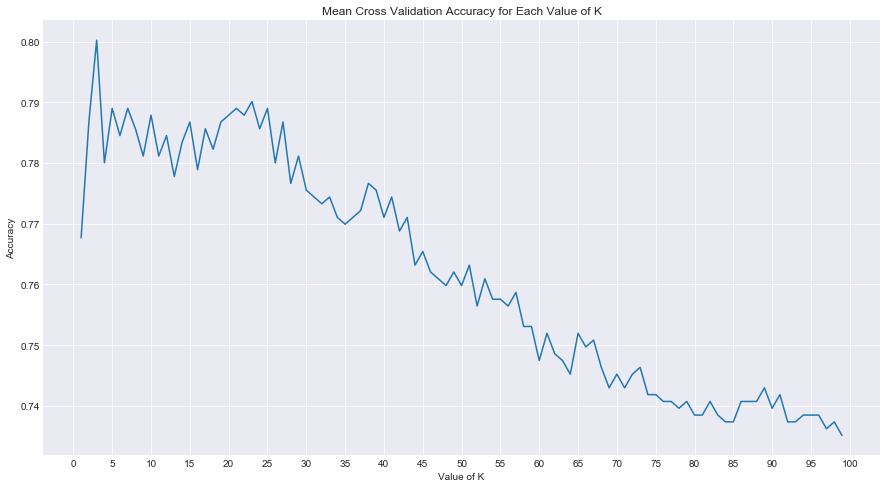

In [190]:
plt.figure(figsize=(15,8))
plt.plot(k_range,mean_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Mean Cross Validation Accuracy for Each Value of K')
plt.xticks(np.arange(min(k_range)-1, max(k_range)+5, 5.0))
plt.show()

We can see that this model performs fairly well for values of k up to about 25 before it starts to tail off.  It looks like the optimal value of k is 3.  Let's see if Grid Search selected that as the best parameter value.

In [191]:
print('Best Score: ',grid.best_score_)
print('Optimal Value of k: ',grid.best_params_)

Best Score:  0.800224466891
Optimal Value of k:  {'n_neighbors': 3}


The grid Search also chose a k of 3 and we get a mean accuracy of avout 80%.  Let's predict values for the test set and see how this model fares.

In [192]:
y_pred = grid.predict(X_test_norm)

In [193]:
export_kaggle(y_pred,'Data/knn2.csv')

This model actually performed slightly worse against the test set with an accuracy score of 0.70813.  Let's try optimizing some of the other hyperparameters in addition to the value of k.  We can try weighting the distance of the neighbors in addition to the default uniform.  We will also try using Manhattan distance in addition to the default Euclidian distance.  In the interest of reducing compute time, we will scale down the range of k values to between 1 and 30.

In [194]:
k_range = list(range(1,30))
param_grid = dict(n_neighbors=k_range,
                 weights=['uniform','distance'],
                 p=[1,2])

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [195]:
grid.fit(X_train_norm,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [196]:
print('Best Score: ',grid.best_score_)
print('Optimal Parameters: ',grid.best_params_)
print('Optimal Model: ',grid.best_estimator_)

Best Score:  0.803591470258
Optimal Parameters:  {'weights': 'uniform', 'n_neighbors': 3, 'p': 1}
Optimal Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')


The optimal model given these options uses a k of 3, Manhattan distance, and uniform weights.  This model produces a mean accuracy of about 80% for the training data using 10 fold cross validation.  Let's see how it does for the test data.

In [197]:
y_pred = grid.predict(X_test_norm)

In [198]:
export_kaggle(y_pred,'Data/knn3.csv')

This model scored slightly better against the test data with an accuracy score of 0.72727.  

Let's see if we can do any better using a random forest classifier.

<a id='5.4'></a>
### 5.4 Random Forest Classifier

Once again, we'll start by using the default parameter values in order to get a baseline accuracy score and then we will tune the hyperparameters to try to improve the accuracy of the model.

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rfc = RandomForestClassifier(random_state=888)

In [135]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=888, verbose=0, warm_start=False)

In [139]:
y_pred = rfc.predict(X_test)

In [140]:
export_kaggle(y_pred,'Data/rfc1.csv')

This model achieved an accuracy score of 0.73205 against the test data set.  Let's see what happens if we increase the number of trees from the default 10 to 200.

In [199]:
rfc = RandomForestClassifier(n_estimators=200,random_state=888)

In [200]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=888, verbose=0, warm_start=False)

In [206]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=888, verbose=0, warm_start=False)>

In [201]:
y_pred = rfc.predict(X_test)

In [202]:
export_kaggle(y_pred,'Data/rfc2.csv')

This RFC performed slightly better with an accuracy of 0.76076.  That still isn't great though.  Let's try tuning some additional parameters with grid search.

In [220]:
param_grid = dict(n_estimators=[200],
                 random_state=[888],
                 max_depth=[1,3,10,30,100],
                 max_leaf_nodes=[10,30,100],
                 min_samples_leaf=list(range(1,10)),
                 min_samples_split=list(range(2,10)))

grid = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy',verbose=2,n_jobs=4)

In [221]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   17.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   30.4s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   49.6s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed:  5.7min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed:  8.0min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed:  9.3min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 10.7min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 12.2min
[Parallel(n

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=888, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_depth': [1, 3, 10, 30, 100], 'n_estimators': [200], 'random_state': [888], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'max_leaf_nodes': [10, 30, 100], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [223]:
print('Best Score: ',grid.best_score_)
print('Optimal Parameters: ',grid.best_params_)
print('Optimal Model: ',grid.best_estimator_)

Best Score:  0.832772166105
Optimal Parameters:  {'max_depth': 10, 'n_estimators': 200, 'min_samples_leaf': 1, 'min_samples_split': 7, 'max_leaf_nodes': 30, 'random_state': 888}
Optimal Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=888, verbose=0, warm_start=False)


Out of the given parameter options we supplied to it, grid search selected a model with a max depth of 10, minimum samples per leaf of 1, minimum samples per split of 7, and maximum leaf nodes of 30.  This produced an accuracy of about 83% on the training set.  Let's see what we get when we run this model on the test data.

In [224]:
y_pred = grid.predict(X_test)

In [225]:
export_kaggle(y_pred,'Data/rfc3.csv')

This model results in an accuracy score of 0.77511 when run against the test set.  This is definitely the best random forest classifier we've built, but we still haven't beaten the best logistic regression model that we built.

<a id='5.5'></a>
### 5.5 Gradient Boosted Classifier

We tried a random forest and got decent results, but still weren't able to beat our best score.  Let's see if breaking out the big guns and using gradient boosting will help.

In [226]:
from sklearn.ensemble import GradientBoostingClassifier

First, let's just construct a gradient boosted classifier using 200 estimators and the default values for the rest of the hyperparameters.  We can tune it from there.

In [227]:
gbc = GradientBoostingClassifier(n_estimators=200)

In [228]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [230]:
y_pred = gbc.predict(X_test)

In [231]:
export_kaggle(y_pred,'Data/gbc1.csv')

This inital model produces an accuracy of 0.76076, which is the same score we get with the random forest that we created using the same parameters.  Let's see what happens if we pass the optimal RFC parameters to a gradient boosted model.

In [232]:
gbc = GradientBoostingClassifier(max_depth=10,n_estimators=200,min_samples_leaf=1,min_samples_split=7,max_leaf_nodes=30)

In [233]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=30,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=7,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [234]:
y_pred = gbc.predict(X_test)

In [236]:
export_kaggle(y_pred,'Data/gbc2.csv')

This model actually produced a worse score of 0.74162.  Let's try running a grid search to optimize the gradient boosted model instead, but let's also try increasing the number of estimators.

In [237]:
param_grid = dict(learning_rate=[0.1,0.05,0.02,0.01],
                  max_depth=[1,3,10],
                  max_leaf_nodes=[10,30,100],
                  min_samples_leaf=[1,3,10,30],
                  min_samples_split=list(range(2,10)))

gbc = GradientBoostingClassifier(n_estimators=3000)

grid = GridSearchCV(gbc, param_grid, cv=10, scoring='accuracy',verbose=2,n_jobs=4)

In [238]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1152 candidates, totalling 11520 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   21.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 17.6min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 27.8min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 38.6min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 43.9min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 52.9min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 71.8min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 78.1min
[Parallel(n_jobs=4)]: Done 7930 tasks      | elapsed: 89.6min
[Parallel(n_jobs=4)]: Done 9105 tasks      | elapsed: 109.1min
[Parallel(n_jobs=4)]: Done 10360 tasks      | elapsed: 119.8min
[Parallel

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'max_leaf_nodes': [10, 30, 100], 'min_samples_leaf': [1, 3, 10, 30], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9], 'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=2)

In [239]:
print('Best Score: ',grid.best_score_)
print('Optimal Parameters: ',grid.best_params_)
print('Optimal Model: ',grid.best_estimator_)

Best Score:  0.835016835017
Optimal Parameters:  {'max_leaf_nodes': 10, 'max_depth': 3, 'min_samples_split': 2, 'learning_rate': 0.01, 'min_samples_leaf': 30}
Optimal Model:  GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=10,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=30, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


Using grid search to select the optimum values for the hyperparameters, we get a model with max_leaf_nodes set to 10, max_depth set to 3, min_samples_split set to 2, min_samples_leaf set to 30 and a learning rate of 0.01.  This resulted in a mean cross validation accuracy score of 83.5%.

In [240]:
y_pred = grid.predict(X_test)

In [241]:
export_kaggle(y_pred,'Data/gbc3.csv')

After tuning the gradient boosted classifier using grid search, we actually get a slightly worse accuracy for the test set than we did with the initial configuration.  This model produces an accuracy score of 0.75119.

---
<a id='6'></a>
## 6 Conclusions and Future Work